<h1>Question 1</h1>

A confusion matrix is a model evaluation tool in machine learning applications. It's simply a matrix that describes the performance of our classification model on a test set for which we know the true values. The pictures below show how to compute it on a given model:

<img src="Confusion Matrix.png" alt="Confusion Matrix">

True Positives and True Negatives are the observations that are correctly predicted. False Positive and False Negatives are observations which are incorrectly predicted. These observations should be minimized. These values occur when your actual class contradicts with the predicted class. Let's define them more precisely and get help from an imaginary example:
Let's imagine that we've built a classification model that given some medical conditions and values, predicts if someone has cancer(yes) or not(no). Now let's imagine we've calculated the confusion matrix for the model. What do any of the numbers mean? 
True Positives (TP) - True Positives are values which are predicted correctly meaning that the actual class value is positive(yes) and the value of the predicted class is also yes. In our example, True Positives are patients that actually have cancer and the model has correctly predicted that the patients indeed have cancer (has given a yes answer).    
True Negatives (TN) - True Negatives are also values which are predicted correctly meaning that the actual class value is negative(no) and the value of the predicted class is also no. In our example, True Negatives are patients that actually don't have cancer and the model has correctly predicted that the patients indeed don't have cancer (has given a no answer).

False Positives (FP) – This occurs when the actual class value is no and the predicted class value is yes. In our example this indicates patients that actually don't have cancer but the model has falsely predicted that they have (has falsely given a yes answer).
 
False Negatives (FN) – This occurs when the actual class value is yes but the predicted class value is no. In our example this indicates patients that actually have cancer but the model has falsely predicted that they don't (has falsely given a no answer).


<h1>Question 2</h1>

We are going to implement the Decision Tree classifer on the Hayes Roth dataset. We'll do a train test split,fit the model on train set,then predict the model with test set and obtain the confusion matrix, accuracy, and error values. We'll then find the optimal depth of the tree using k fold cross validation with GridSearchCV, train the model again with the best depth value and compare the results.

First we'll load the packages necessary for this project:

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

Then we'll load the data and get a glance at it:

In [2]:
data = pd.read_csv('Data_hayes-roth.csv',header=None)
print(data.head())

   0  1  2  3  4
0  2  1  1  2  1
1  2  1  3  2  2
2  3  1  4  1  3
3  2  4  2  2  3
4  1  1  3  4  3


I've dropped the first column in the data as it was the attribute name with 160 unique names coded in numbers, which we don't need for the classification process. 

Before going any further, we need some preprocessing done on the data. First we need to seperate the class labels and store them in variable y as our target values:

In [3]:
y = data.iloc[:,-1].values
print(y)

[1 2 3 3 3 2 2 3 1 1 1 3 1 2 3 1 2 1 1 1 2 1 1 1 1 2 2 2 1 1 3 1 2 1 3 2 2
 2 2 3 2 2 2 1 1 2 1 1 2 1 1 2 2 1 1 1 2 1 1 2 3 2 3 1 3 1 2 2 3 2 3 2 2 1
 3 3 1 3 1 1 3 2 1 1 3 2 2 2 1 2 2 2 2 2 1 2 1 1 3 2 2 1 2 1 3 2 2 3 3 1 1
 2 1 1 1 3 3 2 2 3 2 3 2 3 1 1 3 3 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 1 2 1 2 1 2 1 2 1 3]


Then, we should note that the remaing attributes hobby,age,educational level,and marital status are nominal categorial attributes which have been label encoded and stored as numeric values. But leaving the data values as it is will create confusion for the model and we won't have a correct performance, so we need to One Hot Encode the data before taking any further steps.
One Hot Encoder always takes 2 dimensional arrays as input values, so we need to drop the label column from the original data and store the remaining attributes in variable x1, then we need to seperate the 4 attributes into two seperate variables x2 and x3,with x2 containing the hobby and age columns,and x3 containing the educational level and marital status  columns. We then will build a One Hot Encoder object, transform x2 and x3 with it,store the transformed features in variables x4 and x5, and finally concat the latter to obtain the final dataset x:

In [4]:
x1 = data.iloc[:,:-1]
x2 = x1.iloc[:,:2]
x3 = x1.iloc[:,2:]

onehotencoder = OneHotEncoder()

x4 = onehotencoder.fit_transform(x2).toarray()
x5 = onehotencoder.fit_transform(x3).toarray()

x = np.concatenate((x4,x5),axis=1)
print(x.shape)

(160, 15)


As we can see,the range for the hobby feature was between 1 and 3,and the range for the rest of the features were 1 and 4, so the encoder has transformed the hobby column to 3 encoded columns,and has transformed the rest of the columns to 4 corresponding columns each,resulting in 15 final features.
We will now perform train test split with test size=0.2 to obtain the train and test sets:

In [5]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42 )

We will now build a decision tree clasifier object,fit it on the train set,perform prediction with the test and train sets,and calculate the test and train error,accuracy,and confusion matrix:

In [13]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Train Confusion Matrix: ')
print(confusion_matrix(y_train,y_train_pred))
print('Test Confusion Matrix: ')
print(confusion_matrix(y_test,y_test_pred))
print('Train Accuracy: ', accuracy_score(y_train,y_train_pred))
print('Test Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Train Error: ', 1-accuracy_score(y_train,y_train_pred))
print('Test Error: ', 1-accuracy_score(y_test,y_test_pred))

Train Confusion Matrix: 
[[49  0  0]
 [10 44  0]
 [ 0  0 25]]
Test Confusion Matrix: 
[[14  2  0]
 [ 2  8  0]
 [ 0  0  6]]
Train Accuracy:  0.921875
Test Accuracy:  0.875
Train Error:  0.078125
Test Error:  0.125


It appears that we have a high training accuracy(0.92),but the test accurct is lower(0.87). This could indicate overfitting,meaning that the depth of the tree has increased and has caused the the model to become too complex.
To fix the issue, we'll perform 10-fold cross validation using GridSearchCV to decide the max_depth for the tree,we will specify depths from 1 to 20 in the parameter grid array,the build a GridSeachCV object and pass the parameter grid to it,fit it on the training set and printing the optimal max_depth:

In [11]:
parameter_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
grid = GridSearchCV(tree.DecisionTreeClassifier(), parameter_grid, cv=10, refit=True)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 6}


For the last part,we'll fit the model on the training set again,this time setting the max_depth to 6,which is supposed to be the best depth,predict the model using train and test sets,and compare the results using the evaluation metrics:

In [12]:
y_train_grid = grid.predict(X_train)
y_test_grid = grid.predict(X_test)

print('Train Confusion Matrix: ')
print(confusion_matrix(y_train,y_train_grid))
print('Test Confusion Matrix: ')
print(confusion_matrix(y_test,y_test_grid))
print('Train Accuracy: ', accuracy_score(y_train,y_train_grid))
print('Test Accuracy: ', accuracy_score(y_test,y_test_grid))
print('Train Error: ', 1-accuracy_score(y_train,y_train_grid))
print('Test Error: ', 1-accuracy_score(y_test,y_test_grid))

Train Confusion Matrix: 
[[45  4  0]
 [12 42  0]
 [ 0  0 25]]
Test Confusion Matrix: 
[[14  2  0]
 [ 2  8  0]
 [ 0  0  6]]
Train Accuracy:  0.875
Test Accuracy:  0.875
Train Error:  0.125
Test Error:  0.125


As observed above, the training accuracy has slightly decreased,but this time it is the same as the test accuracy, which means that we have found the optimal depth of the tree, and that means that setting any depth bigger than 6 on the model will cause overfitting,and cause the train accuracy to increase and test accuracy to decrease.

<h1>Question 3</h1>

In this question we will use the K Nearest Neighbors classifier with the eucledian metric on the Haberman's dataset. In a loop with varying K values between 1 and 40, we will fit the model on the training set and predict it with the test and train sets,calculating the accuracy and error in each iteration and finally will plot them for different Epochs. We will pick 5 different K values and plot the decision boundries and the classification results,in order to compare the difference between big and small K values. Lastly, we will use k fold cross validation with GridSearchCV to decide the optimal K value. 

First let's load the packages necessary for the project:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Let's load the data and do some preprocessing. The features are all numerical, and we have a class label that we need to seperate and store in the y variable. The second feature in the dataset is the patient's year of operation,which we don't need for this classification task. So we'll drop that column and concatenate the rest of the columns together and store them in the x variable: 

In [15]:
data = pd.read_csv('haberman.csv',header=None)
x1 = data.iloc[:,0].values
x2 = data.iloc[:,2].values
x3 = np.concatenate(([[x1],[x2]]))
x = x3.T
y = data.iloc[:,-1].values

Now we'll perform train test split with test size=0.2: 

In [16]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42 )

We'll define lists for storing the train and test accuracies and errors and also the K values for each step of the for loop. We'll define the displayed_k list with 5 picked K values for which we want to do some visualization. We will use colored plot for that purpose. So we need to define a mesh size variable h and some color maps:  

In [18]:
train_accuracy = []
test_accuracy = []
train_error = []
test_error = []
k = []
displayed_k = [1,10,20,30,40]

h = .2
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

Now we will define a for loop with 40 iterations indicating the different K values. In each iterataion, first, we will append the value of K to the k list(we need the list for the error and accuracy plots).Then, we will fit the model on the train set and predict the model with test and train sets.Then, we will calculate the test and train errors and accuracies and append them to their corresponding lists(We need them as well for the above mentoined plots).Then,we will define an if loop for K values 1,10,20,30,and 40,which we have picked for visualization. If the K value in the for loop matches the picked K values to be displayed,it will enter the if loop. In the if loop,for each K value,first,we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max] to plot the decision boundry for the trained model with the corresponding K value. Then, we will put the results into a color plot and display the plot, and also we will plot the training points using a scatter plot.

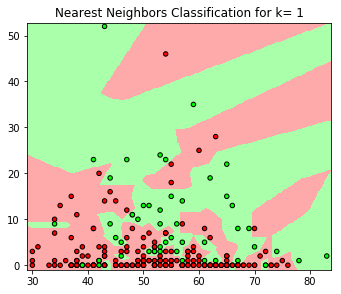

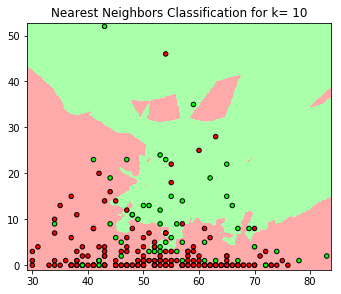

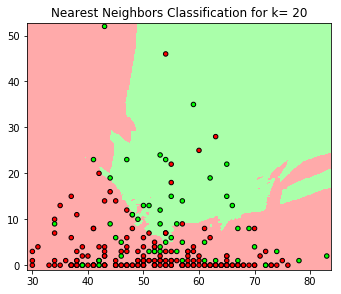

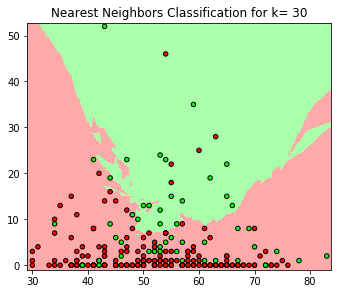

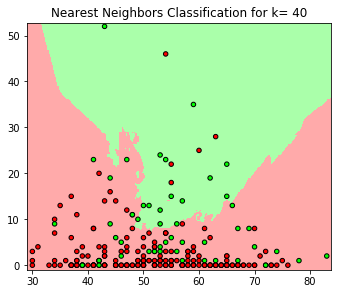

In [19]:
for i in range(1,41):
    k.append(i)
    clf = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    clf.fit(X_train,y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test,y_test_pred))
    train_error.append(1-accuracy_score(y_train,y_train_pred))
    test_error.append(1-accuracy_score(y_test,y_test_pred))
    if i in displayed_k:
# Plotting the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Putting the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(12, 10))
        plt.subplot(2,2,1)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plotting the training points        
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train , cmap=cmap_bold, edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title('Nearest Neighbors Classification for k= %i' %i)
    plt.show()    

Comparing the decision boundries and the plots for small and big K values show us that in small K values,the structure of space is captured better,as visible in the first two plots, because it is very sensitive to noise, and tries to classify each of them correctly, for example in the first plot we see many small red areas trying to capture the red noise spots and seperating them from the green ones. In big K values, the algorithm is far less sensitive to noise, for example in the last plot we can see that many green noise points are classified as red, and vice versa, but the large K values can be computationally expensive,which is why a balance is needed between the small and big K values.

Now we'll use the the accuracy and error lists and the K values list prepared from above to plot them:

Text(0.5,1,'Train Vs. Test Accuracy for k between 1 & 40')

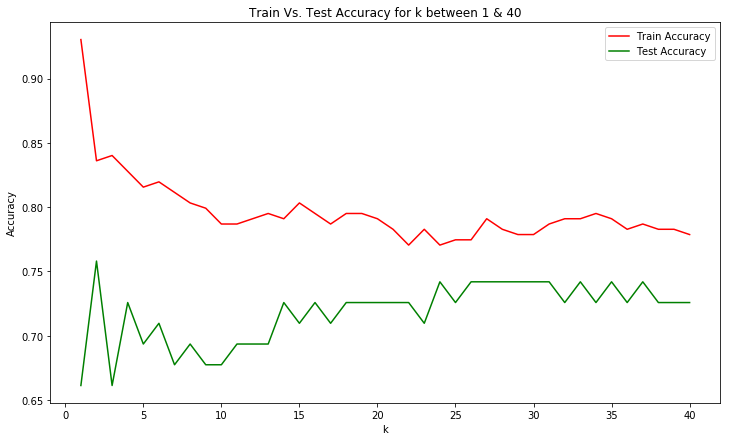

In [20]:
plt.figure(figsize=(12, 7))
plt.plot(k, train_accuracy , label='Train Accuracy',color='r')
plt.plot(k, test_accuracy , label='Test Accuracy',color='g')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train Vs. Test Accuracy for k between 1 & 40')  

Text(0.5,1,'Train Vs. Test Error for k between 1 & 40')

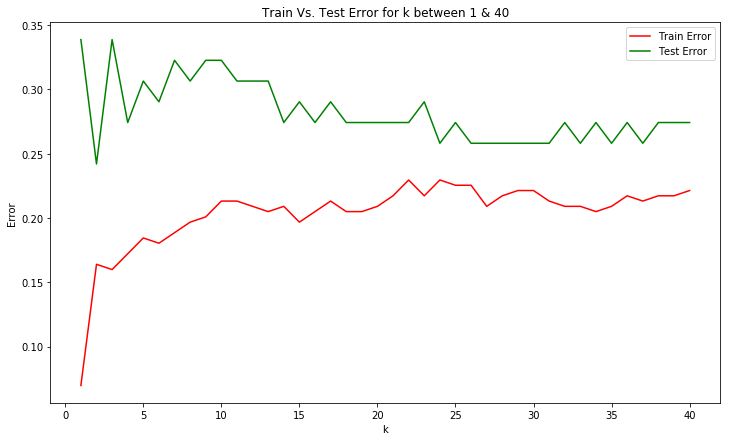

In [21]:
plt.figure(figsize=(12, 7))
plt.plot(k, train_error , label='Train Error',color='r')
plt.plot(k, test_error , label='Test Error',color='g')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.title('Train Vs. Test Error for k between 1 & 40') 

In the last part, we will fit the knn model without specifying the neighbors value and compute the accuracy,error, and confusion matrix. We will then use GridSearchCV with the similar technique from the Question 2 to obtain the best K value. We will train the model once more using the optimal value and compare the results: 

In [22]:
clf = KNeighborsClassifier(metric='euclidean')
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Train Confusion Matrix: ')
print(confusion_matrix(y_train,y_train_pred))
print('Test Confusion Matrix: ')
print(confusion_matrix(y_test,y_test_pred))
print('Train Accuracy: ', accuracy_score(y_train,y_train_pred))
print('Test Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Train Error: ', 1-accuracy_score(y_train,y_train_pred))
print('Test Error: ', 1-accuracy_score(y_test,y_test_pred))

Train Confusion Matrix: 
[[168  13]
 [ 32  31]]
Test Confusion Matrix: 
[[38  6]
 [13  5]]
Train Accuracy:  0.8155737704918032
Test Accuracy:  0.6935483870967742
Train Error:  0.18442622950819676
Test Error:  0.30645161290322576


Now using 9 fold cross validation with Grid Search:

In [24]:
parameter_grid = {'n_neighbors': k ,'metric':['euclidean']}
grid = GridSearchCV(clf, parameter_grid, cv=9, refit=True)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'metric': 'euclidean', 'n_neighbors': 30}


We could guess from the plot in the previous part for k=30 that this would be the optimal K value,not too complex and indifferent to noise and not too sensitive to it either. We will make sure by doing the training and calculating the metrics again:

In [25]:
y_train_grid = grid.predict(X_train)
y_test_grid = grid.predict(X_test)

print('Train Confusion Matrix: ')
print(confusion_matrix(y_train,y_train_grid))
print('Test Confusion Matrix: ')
print(confusion_matrix(y_test,y_test_grid))
print('Train Accuracy: ', accuracy_score(y_train,y_train_grid))
print('Test Accuracy: ', accuracy_score(y_test,y_test_grid))
print('Train Error: ', 1-accuracy_score(y_train,y_train_grid))
print('Test Error: ', 1-accuracy_score(y_test,y_test_grid))

Train Confusion Matrix: 
[[175   6]
 [ 48  15]]
Test Confusion Matrix: 
[[42  2]
 [14  4]]
Train Accuracy:  0.7786885245901639
Test Accuracy:  0.7419354838709677
Train Error:  0.2213114754098361
Test Error:  0.25806451612903225


We can see that the train accuracy before grid search was high and the test accuracy was lower,suggesting an overfit. But after setting the optimal neighbors to 30, the train and test accuracies are close and somewhat improven, so these values toghether with the plot above show that 30 is indeed the optimal parameter value for K.   